In [2]:
#read data
import pandas as pd
tweets_all = pd.read_csv('Raw tweets_Jan6_2:40AM_CST_all.csv')
replies = pd.read_csv('Raw tweets_Jan6_2:40AM_CST_replies.csv')
retweets = pd.read_csv('Raw tweets_Jan6_2:40AM_CST_retweets.csv')
print('The number of all tweets:',len(tweets_all['tweets']))
print('The number of replies:',len(replies['tweets']))
print('The number of retweets:',len(retweets['tweets']))
text = tweets_all.append(replies).drop_duplicates(keep=False)
text = retweets
#text.to_csv('Jan6(excludes replies).csv')
print('The number of tweets (excludes replies):',len(text))

The number of all tweets: 7942
The number of replies: 1441
The number of retweets: 3261
The number of tweets (excludes replies): 3261


In [3]:
#exclude replies
text = tweets_all.append(replies).drop_duplicates(keep=False)
text.to_csv('Jan6(excludes replies).csv')
print('The number of tweets (excludes replies):',len(text))

The number of tweets (excludes replies): 6501


In [4]:
text[:10]

,tweets,date,Company,url
0,"RT: To start off last year, in January 2020, @...",2021-01-05 15:59:55,Memphis Meats,https://twitter.com/MemphisMeats/status/134648...
1,Happy New Year from Memphis Meats! We’re closi...,2020-12-30 23:14:26,Memphis Meats,https://twitter.com/MemphisMeats/status/134442...
2,"In these unprecedented times, we are devoting ...",2020-12-23 19:00:56,Memphis Meats,https://twitter.com/MemphisMeats/status/134182...
4,We chatted with @FoodDive on what’s happening ...,2020-12-16 21:26:40,Memphis Meats,https://twitter.com/MemphisMeats/status/133932...
5,From climate chaos to climate transformation? ...,2020-12-15 20:16:03,Memphis Meats,https://twitter.com/MemphisMeats/status/133894...
6,The holidays feel a little different this year...,2020-12-10 00:24:51,Memphis Meats,https://twitter.com/MemphisMeats/status/133682...
8,RT: Learn about releasing a COVID19 related fi...,2020-12-08 00:13:44,Memphis Meats,https://twitter.com/MemphisMeats/status/133610...
9,Our CEO @UmaValeti will be speaking today at 1...,2020-12-05 14:13:30,Memphis Meats,https://twitter.com/MemphisMeats/status/133522...
10,Our team is committed to perfecting a deliciou...,2020-12-03 23:32:24,Memphis Meats,https://twitter.com/MemphisMeats/status/133464...
11,2020 has been an interesting year for us all. ...,2020-11-26 22:05:46,Memphis Meats,https://twitter.com/MemphisMeats/status/133208...


In [7]:
#Text Cleaning
import pandas as pd
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from gensim.models import CoherenceModel
import gensim
import gensim.corpora as corpora
import re
porter = PorterStemmer()
stop_words = stopwords.words('english')
stop_words += ['cultured','clean','cultivated']
b = []
for i,u in text.iterrows():
    a = []
    word =''
    for words in str(u['tweets']).split():
        if '@' not in words: #remove @users
            if '#' not in words:
                if 'http' not in words: #remove URLs
                    if'&amp' not in words: #remove symbol
                        words = words.lower()# lower form
                        words = re.sub(r'[^a-zA-Z]', ' ', words) #replace non-alphabets characters with space. From "can't" to "can t"
                        if len(words)>3:
                            word += (words+' ')
    doc = ''
    for token in word.split():
        if token not in stop_words:
            token = porter.stem(token) #root form
            doc += (token+' ')
    b.append(doc)
text['processed']=[i for i in b]

In [8]:
text['processed'][:10]

0     start last year januari becam first compani ra...
1     happi year memphi meat close gratitud team sup...
2     unpreced time devot attent brighter futur cell...
4                      chat happen cellular agricultur 
5     climat chao climat transform proud name compan...
6     holiday feel littl differ year still excit fut...
8     learn releas covid relat film world pandem eth...
9                       speak today iit virtual summit 
10    team commit perfect delici product last impact...
11    interest year thank commun support enthusiasm ...
Name: processed, dtype: object

In [9]:
#Bigram
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence),deacc=True)) #將句子變為token，生成list
data_words = list(sent_to_words(text['processed'])) #tokenization
bigram = gensim.models.Phrases(data_words,min_count=1,threshold=1)
'''mincount：兩個單詞共同出現次數小於該值，則不會被考慮為bigram，
threshold：Phrases功能中會生成一個'phase score'，超過這個score的bigram會生成在最終結果中，總的來說，mincount越小，threshold越小，最終生成的bigram越多'''
bigram_mod = gensim.models.phrases.Phraser(bigram) #生成bigram
def make_bigrams(texts): #生成bigram
    return [bigram[doc] for doc in texts]
data_words_bigrams = make_bigrams(data_words)
id2word = corpora.Dictionary(data_words_bigrams)
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

In [10]:
data_words_bigrams[:10]

[['start',
  'last_year',
  'januari',
  'becam_first',
  'compani_rais',
  'seri_fund',
  'round',
  'doubl',
  'invest_cell',
  'base_meat',
  'sector'],
 ['happi_year',
  'memphi_meat',
  'close',
  'gratitud',
  'team',
  'support',
  'push',
  'notabl',
  'year',
  'well',
  'excit',
  'determin',
  'better_futur',
  'hope',
  'famili',
  'safe',
  'holiday'],
 ['unpreced_time',
  'devot',
  'attent',
  'brighter_futur',
  'cell_base',
  'meat',
  'bring',
  'peopl',
  'togeth',
  'around_dinner',
  'tabl',
  'proud_team',
  'reflect',
  'last_year',
  'holiday',
  'parti_celebr',
  'commun'],
 ['chat', 'happen_cellular', 'agricultur'],
 ['climat',
  'chao',
  'climat',
  'transform',
  'proud_name',
  'compani',
  'recognit',
  'potenti',
  'tackl_climat',
  'crisi',
  'meaning',
  'measur',
  'solut'],
 ['holiday',
  'feel',
  'littl_differ',
  'year',
  'still',
  'excit_futur',
  'part',
  'cozi',
  'famili',
  'meal',
  'would',
  'want',
  'cook',
  'holiday',
  'cell_base',

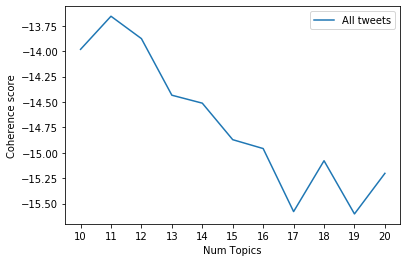

In [14]:
#Coherence Score

def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start,limit,step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics,random_state=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
limit=21; start=10; step=1
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=start, limit=limit, step=step)
# Show graph
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values,label='All tweets')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(loc='best')
plt.xticks(range(start,limit,step))
plt.show()

In [15]:
#Print Bigrams Within Each topic
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=11,random_state=4,alpha='auto',per_word_topics=True)
#pprint(lda_model.print_topics(num_words=400))
for idx, topic in lda_model.show_topics(formatted=False,num_topics=11,num_words= 400):
    print('\n',end='')
    print('Topic:',idx)
    for w in topic:
        if '_' in w[0]:
            print(round(w[1],4),'*',w[0],', ',end='',sep='')


Topic: 0
0.0062*isra_startup, 0.0056*eat_meat, 0.0051*anim_free, 0.0041*cellular_agricultur, 0.0035*base_meat, 0.0034*plant_base, 0.0034*futur_food, 0.0031*news_excit, 0.0026*meat_plant, 0.0024*world_first, 0.0021*convent_meat, 0.0021*work_make, 0.0021*everi_day, 0.0019*cell_cultur, 0.0019*meat_market, 0.0019*amp_innov, 0.0018*help_make, 0.0018*panel_moder, 0.0017*repres_meat, 0.0017*listen_episod, 0.0017*make_meat, 0.0017*bring_cell, 0.0016*cell_base, 0.0016*industri_advoc, 0.0016*regulatori_clariti, 0.0016*letter_sign, 0.0016*support_joint, 0.0016*industri_well, 0.0016*matter_director, 0.0016*realiti_reward, 0.0016*brand_maria, 0.0016*macedo_talk, 0.0016*increasingli_realiz, 0.0016*profound_benefit, 0.0016*consum_worldwid, 0.0016*meat_craft, 0.0016*develop_goal, 0.0016*sure_sign, 0.0015*product_facil, 0.0014*meat_product, 0.0014*co_founder, 0.0014*meat_grown, 0.0013*well_done, 0.0013*grow_meat, 0.0012*directli_cell, 0.0012*stay_tune, 0.0009*cell_line, 0.0009*last_year, 0.0008*food_t

0.0108*base_meat, 0.0094*cell_base, 0.0064*food_system, 0.004*meat_revolut, 0.004*chang_world, 0.004*work_hard, 0.0037*portfolio_compani, 0.0036*made_cell, 0.0035*futur_food, 0.0034*plant_base, 0.0033*watch_record, 0.0033*altern_protein, 0.003*gt_gt, 0.003*farm_anim, 0.0028*good_news, 0.0026*convent_meat, 0.0025*startup_like, 0.0024*first_time, 0.0023*grow_team, 0.0022*interest_articl, 0.0021*vegan_food, 0.0021*sustain_altern, 0.0021*make_histori, 0.0021*live_stream, 0.002*around_world, 0.002*make_sure, 0.002*anim_product, 0.0019*oxford_studi, 0.0019*reduc_environment, 0.0019*less_water, 0.0019*thank_great, 0.0018*meat_also, 0.0017*green_planet, 0.0017*flavor_grain, 0.0017*juici_tender, 0.0017*process_could, 0.0017*project_product, 0.0017*slice_perfectli, 0.0017*food_cite, 0.0017*meat_sear, 0.0017*highlight_cell, 0.0017*cut_delici, 0.0017*duck_orang, 0.0017*effici_self, 0.0017*superior_tast, 0.0017*chat_interest, 0.0017*renew_great, 0.0017*desir_appetit, 0.0017*simpli_harvest, 0.0017*c

In [16]:
#Calculate the number of tweets within each topic
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: x[1], reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text['tweets'])
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic
# tweets count
print('\n')
print('Number of Tweets within each topic:',df_dominant_topic.groupby('Dominant_Topic')['Text'].count())



Number of Tweets within each topic: Dominant_Topic
0.0      433
1.0      348
2.0      493
3.0      370
4.0      372
5.0      286
6.0     1122
7.0      371
8.0      494
9.0      504
10.0     316
Name: Text, dtype: int64


In [18]:
table1  = pd.read_excel('Table 1,2,3 Jan 6.xlsx',sheet_name=0)
table2 = pd.read_excel('Table 1,2,3 Jan 6.xlsx',sheet_name=1)
table3  = pd.read_excel('Table 1,2,3 Jan 6.xlsx',sheet_name=3)
table4 = pd.read_excel('Table 1,2,3 Jan 6.xlsx',sheet_name=2)

In [19]:
table1

,Topic,Bigrams within topics,Number of tweets
0,1,"israel startup, eat meat, animal free, cellula...",433
1,2,"alepha farm, grown meat, feed billion, public ...",348
2,3,"shiok meat, mark post, next week, co-founder, ...",493
3,4,"meat startup, beyond meat, future food, check ...",370
4,5,"base meat, cell based, food system, meat revol...",372
5,6,"future food, cell based, delicious meat, human...",286
6,7,"cell based, climate change, lab grown, plant b...",1122
7,8,"alternative protein, plant based, invest meat,...",371
8,9,"lab grown, slaughter free, world first, look f...",494
9,10,"plant based, alternative protein, meat industr...",504


In [20]:
table2

,Theme,Bigrams within topics
0,Environmental Impact,"reduce environment, damage environment, enviro..."
1,NaN,"without environment, environmental issues, car..."
2,NaN,"greenhouse emission,"
3,NaN,envoronmental ipmact
4,NaN,champion environment
...,...,...
104,Market,"meat market, consumer worldwild"
105,NaN,"hit market, product market"
106,NaN,road market
107,NaN,"bring market, give consumer"


In [21]:
table3

,Theme,Tweets samples,Tweet link
0,Climate change,"In honor of #EarthDay2020, we are challenging ...",https://twitter.com/BlueNaluInc/status/1252764...
1,NaN,.@FastCompany reports on the announcement from...,https://twitter.com/AlephFarms/status/12731840...
2,NaN,"""One piece of advice can help you survive soci...",https://twitter.com/AlephFarms/status/12456080...
3,Different names of cultured meat,Achieving the perfect look and taste of our ce...,https://twitter.com/MemphisMeats/status/131677...
4,NaN,"Wait, did Robert Downey Jr just feature our me...",https://twitter.com/mosa_meat/status/133834347...
5,NaN,What's your main reason to support the transit...,https://twitter.com/mosa_meat/status/975010825...
6,seafood,Approximately 3 billion people in the world re...,https://twitter.com/FinlessFoods/status/110012...
7,NaN,We believe there's a better way to enjoy the s...,https://twitter.com/BlueNaluInc/status/1248764...
8,NaN,"""With its significant Series A complete, BlueN...",https://twitter.com/BlueNaluInc/status/1232814...
9,Poultry,"""According to a white paper by @GoodFoodInst, ...",https://twitter.com/BlueNaluInc/status/1169004...


In [22]:
table4

,Company Name,Number of tweets extracted,Number of tweets shown on twitter
0,Aleph Farms,858,867
1,Avant Meats,2,2
2,Balletic Foods,26,26
3,BlueNalu,369,369
4,CUBIQ FOODS,263,263
5,Fineless Foods,664,667
6,Future Fields,46,46
7,FutureMeat,33,33
8,LabFarmFoods,4,4
9,Meatable,122,122
